In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import shap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [5]:
data=pd.read_csv("Training.csv")

In [6]:
data1.head()

NameError: name 'data1' is not defined

In [4]:
data.head

<bound method NDFrame.head of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0  

In [7]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [8]:
#checking the null values in the data
data.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [9]:
data = data.drop('Unnamed: 133', axis=1)

In [10]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [11]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.shape

(4920, 133)

In [13]:
import pandas as pd

# Load your disease prediction dataset
# Replace 'your_dataset.csv' with the path to your dataset file


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the threshold for high correlation (absolute value)
threshold = 0.7  # Adjust the threshold as needed

# Extract pairs of highly correlated features
highly_correlated_pairs = {}

# Iterate over each pair of features in the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        correlation_coefficient = correlation_matrix.iloc[i, j]
        
        # Check if the absolute value of correlation coefficient is above the threshold
        if abs(correlation_coefficient) >= threshold:
            # Add the pair to the dictionary
            highly_correlated_pairs[(feature1, feature2)] = correlation_coefficient

# Print the highly correlated pairs of features along with their correlation coefficients
for pair, correlation_coefficient in highly_correlated_pairs.items():
    print(f"Features: {pair}, Correlation Coefficient: {correlation_coefficient:.2f}")


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Features: ('nodal_skin_eruptions', 'dischromic _patches'), Correlation Coefficient: 0.89
Features: ('shivering', 'watering_from_eyes'), Correlation Coefficient: 0.89
Features: ('muscle_wasting', 'patches_in_throat'), Correlation Coefficient: 0.89
Features: ('muscle_wasting', 'extra_marital_contacts'), Correlation Coefficient: 0.89
Features: ('weight_gain', 'cold_hands_and_feets'), Correlation Coefficient: 0.95
Features: ('weight_gain', 'puffy_face_and_eyes'), Correlation Coefficient: 0.95
Features: ('weight_gain', 'enlarged_thyroid'), Correlation Coefficient: 0.97
Features: ('weight_gain', 'brittle_nails'), Correlation Coefficient: 0.97
Features: ('weight_gain', 'swollen_extremeties'), Correlation Coefficient: 0.97
Features: ('anxiety', 'drying_and_tingling_lips'), Correlation Coefficient: 0.95
Features: ('anxiety', 'slurred_speech'), Correlation Coefficient: 0.97
Features: ('anxiety', 'palpitations'), Correlation Coefficient: 0.97
Features: ('cold_hands_and_feets', 'puffy_face_and_eye

In [14]:
import pandas as pd

# Load your disease prediction dataset
# Replace 'your_dataset.csv' with the path to your dataset file


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the threshold for high correlation (absolute value)
threshold = 0.8  # Adjust the threshold as needed

# Extract pairs of highly correlated features
highly_correlated_pairs = {}

# Iterate over each pair of features in the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        correlation_coefficient = correlation_matrix.iloc[i, j]
        
        # Check if the absolute value of correlation coefficient is above the threshold
        if abs(correlation_coefficient) >= threshold:
            # Add the pair to the dictionary
            highly_correlated_pairs[(feature1, feature2)] = correlation_coefficient

# Decide which feature to remove from each highly correlated pair
features_to_remove = set()
for pair, correlation_coefficient in highly_correlated_pairs.items():
    feature1, feature2 = pair
    # Remove one feature based on your preference or domain knowledge
    # For example, remove the feature with the highest number of missing values
    if data[feature1].isnull().sum() > data[feature2].isnull().sum():
        features_to_remove.add(feature2)
    else:
        features_to_remove.add(feature1)

# Print the features to be removed
print("Features to be removed:", len(features_to_remove))


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Features to be removed: 51


In [ ]:
for i in features_to_remove:
    data=data.drop(i,axis=1)

In [15]:

# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [18]:
#dividing the dataset into feature and target variables
data_input=data.drop(columns=['prognosis'])
data_output=data['prognosis']
data_input

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [19]:
#checking whether the features are properly disturbuted or not
data['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [ ]:
#decision tree and  KNN classfiers are best suited for this type

In [20]:
#splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('-------------------------------')
print('X_val =', X_val.shape)
print('y_val.shape =', y_val.shape)
print('-------------------------------')
print('X_test =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (2410, 132)
y_train.shape = (2410,)
-------------------------------
X_val = (1034, 132)
y_val.shape = (1034,)
-------------------------------
X_test = (1476, 132)
y_test.shape = (1476,)


In [22]:
dt=DecisionTreeClassifier(max_depth=3,random_state=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [23]:
y_pred_train = dt.predict(X_train)
y_pred_val = dt.predict(X_val)

In [24]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))

0.10954356846473029
0.086073500967118


In [36]:
# increasing the accuracy and by increasing the max_depth
max_depth=[ i for i in range(1,46)]
training_accu=[]
validation_acc=[]
for  i in max_depth:
    enhanced_model=DecisionTreeClassifier(max_depth=i,random_state=2)
    enhanced_model.fit(X_train,y_train)
    y_pred_train1=enhanced_model.predict(X_train)
    y_pred_val1=enhanced_model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train1)
    acc_val = accuracy_score(y_val, y_pred_val1)
    
    # add these results to the lists
    training_accu.append(acc_train)
    validation_acc.append(acc_val)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

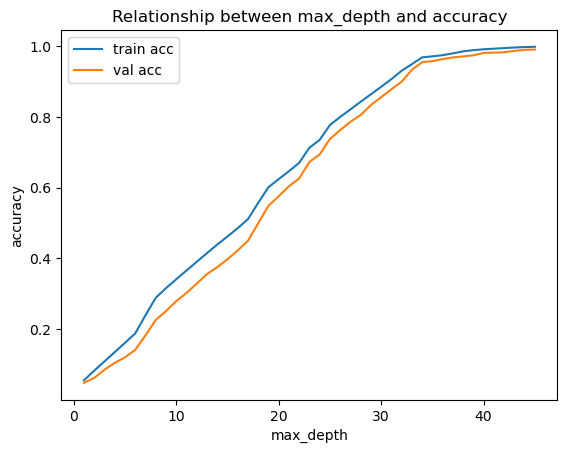

In [39]:
plt.plot(max_depth, training_accu, label="train acc")
plt.plot(max_depth, validation_acc, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

In [41]:
#as the max_depth of 45 the decsion tree classifier gives the correct accuracy
model_best = DecisionTreeClassifier(max_depth=45, random_state=2)
model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=45, random_state=2)

In [42]:
y_pred_test = model_best.predict(X_test)

In [43]:
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

Test accuracy: 0.9878048780487805


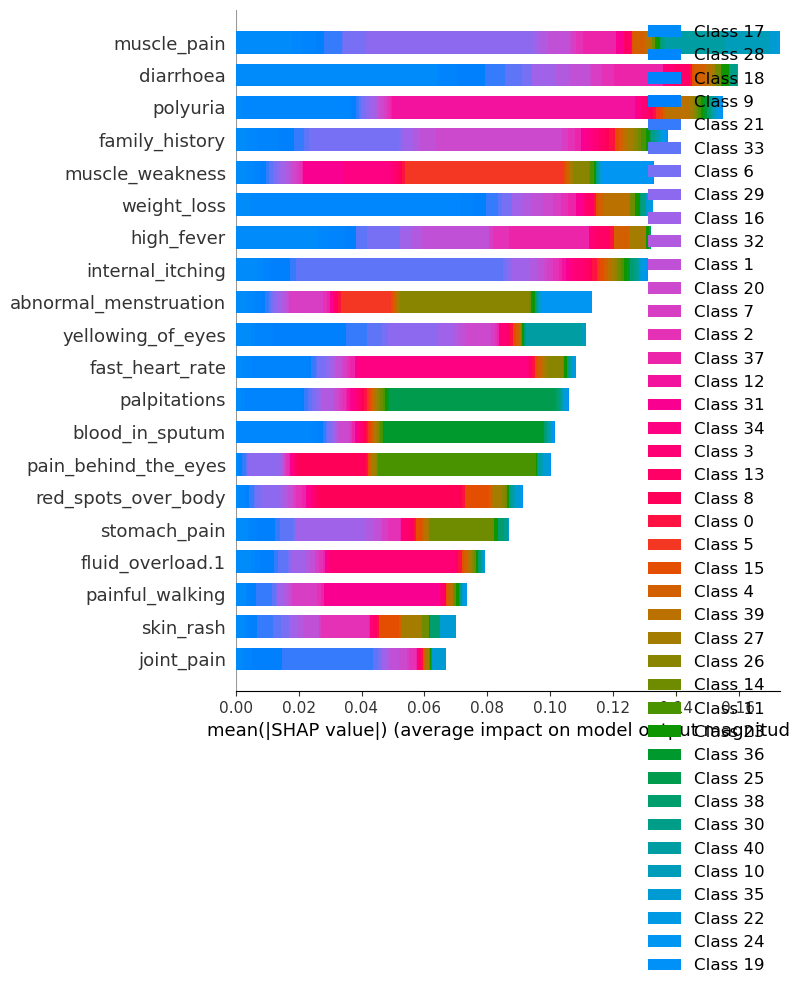

In [66]:


# Assuming you have a trained model named 'model' and a dataset named 'X_test'
# 'model' could be any model supported by SHAP, such as XGBoost, LightGBM, scikit-learn models, etc.

# Create an explainer object
explainer = shap.Explainer(model_best, X_train)

# Calculate SHAP values for all features in the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for a specific instance
# Let's say we want to visualize the SHAP values for the first instance in the test set


# You can also create summary plots to visualize feature importance across the dataset
shap.summary_plot(shap_values, X_test)


In [ ]:
#INitikalizing the KNN classifier


In [49]:
knn_model=KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train,y_train)
y_pred_train2=knn_model.predict(X_train)
y_pred_val2=knn_model.predict(X_val)

In [50]:
#printing the accuracy of the knn model
print(accuracy_score(y_train,y_pred_train2))
print(accuracy_score(y_val,y_pred_val2))

1.0
1.0


For n_neighbors=1:
Training accuracy = 1.0
Validation accuracy = 1.0
-----------------------------
For n_neighbors=2:
Training accuracy = 1.0
Validation accuracy = 1.0
-----------------------------
For n_neighbors=3:
Training accuracy = 1.0
Validation accuracy = 1.0
-----------------------------
For n_neighbors=4:
Training accuracy = 1.0
Validation accuracy = 1.0
-----------------------------
For n_neighbors=5:
Training accuracy = 1.0
Validation accuracy = 1.0
-----------------------------
For n_neighbors=6:
Training accuracy = 0.9987551867219917
Validation accuracy = 0.9970986460348162
-----------------------------
For n_neighbors=7:
Training accuracy = 0.9987551867219917
Validation accuracy = 0.9970986460348162
-----------------------------
For n_neighbors=8:
Training accuracy = 0.9987551867219917
Validation accuracy = 0.9970986460348162
-----------------------------
For n_neighbors=9:
Training accuracy = 0.9987551867219917
Validation accuracy = 0.9970986460348162
-------------------

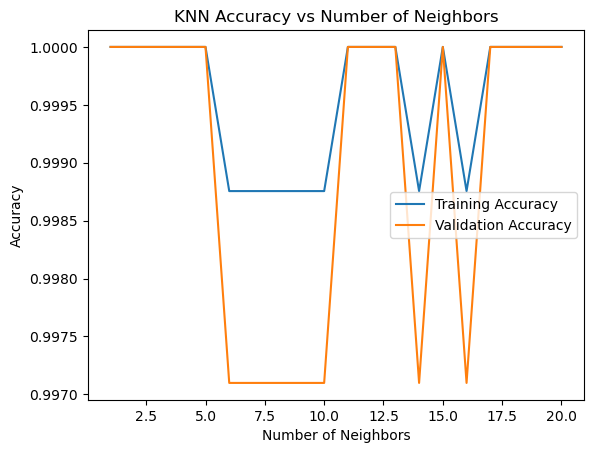

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of n_neighbors
neighbors_range = range(1, 21)

# Initialize lists to store accuracies
train_accuracies = []
val_accuracies = []

for n_neighbors in neighbors_range:
    # Create the KNeighborsClassifier with the current n_neighbors value
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    
    # Fit the model on the training data
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the training and validation data
    y_pred_train = knn_model.predict(X_train)
    y_pred_val = knn_model.predict(X_val)
    
    # Calculate accuracies and store them
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f'For n_neighbors={n_neighbors}:')
    print('Training accuracy =', train_accuracy)
    print('Validation accuracy =', val_accuracy)
    print('-----------------------------')

# Plot the accuracies for visualization
import matplotlib.pyplot as plt

plt.plot(neighbors_range, train_accuracies, label='Training Accuracy')
plt.plot(neighbors_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.legend()
plt.show()


In [73]:
svm_classifier = SVC(kernel='linear', C=0.1, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9979674796747967
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       0.91      1.00      0.95        31
                                   Acne       1.00      1.00      1.00        38
                    Alcoholic hepatitis       1.00      1.00      1.00        34
                                Allergy       1.00      1.00      1.00        33
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        39
                   Cervical spondylosis       1.00      1.00      1.00        41
                            Chicken pox       1.00      1.00      1.00        33
                    Chronic cholestasis       1.00      1.00      1.00        35
                            Common Cold       1.00      1.00      1.00        4

In [72]:
#using the concept of using hyperparameters just for learning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize Grid Search Cross-Validation with the SVM classifier and parameter grid
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross-Validation on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search Cross-Validation
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to initialize a new SVM classifier
best_svm_classifier = SVC(**best_params)

# Train the SVM classifier with the best hyperparameters on the entire training data
best_svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data using the best SVM classifier
y_pred = best_svm_classifier.predict(X_test)

# Calculate the accuracy of the best SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9979674796747967


In [21]:
#using the randomforest model
# Import necessary libraries


# Assuming you have already loaded your dataset and preprocessed it
# X should contain your features, and y should contain your target variable

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust parameters as needed

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model: {:.2f}".format(accuracy))


Accuracy of Random Forest model: 1.00
